In [1]:
pip install torch torchvision facenet-pytorch opencv-python albumentations pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━

In [2]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install expecttest

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install facenet-pytorch

Note: you may need to restart the kernel to use updated packages.


In [5]:
import json
import pandas as pd

json_file = '/kaggle/input/traindataset0/dfdc_train_part_0/dfdc_train_part_0/metadata.json'
df = pd.read_json(json_file)
df = df.T

df.head()

,label,split,original
owxbbpjpch.mp4,FAKE,train,wynotylpnm.mp4
vpmyeepbep.mp4,REAL,train,NaN
fzvpbrzssi.mp4,REAL,train,NaN
htorvhbcae.mp4,FAKE,train,wclvkepakb.mp4
fckxaqjbxk.mp4,FAKE,train,vpmyeepbep.mp4


In [6]:
import json
import os

# 메타데이터 파일 경로 리스트
metadata_paths = [
    '/kaggle/input/traindataset0/dfdc_train_part_0/dfdc_train_part_0/metadata.json', 
    '/kaggle/input/traindataset0/dfdc_train_part_01/dfdc_train_part_1/metadata.json'
]

# 메타데이터 병합
metadata = {}
for path in metadata_paths:
    if os.path.exists(path):  # 파일 존재 여부 확인
        with open(path, "r") as f:
            data = json.load(f)
            metadata.update(data)  # 기존 metadata에 새 데이터를 병합
    else:
        print(f"Warning: Metadata file not found at {path}")

# 데이터 확인
print(f"Total metadata entries: {len(metadata)}")


Total metadata entries: 3033


In [7]:
import os
import json
import random
import pandas as pd

# 데이터셋 경로 설정
folders = [
    '/kaggle/input/traindataset0/dfdc_train_part_0/dfdc_train_part_0',
    '/kaggle/input/traindataset0/dfdc_train_part_01/dfdc_train_part_1'
]

# 메타데이터 파일 경로 설정
metadata_paths = ['/kaggle/input/traindataset0/dfdc_train_part_0/dfdc_train_part_0/metadata.json',
                  '/kaggle/input/traindataset0/dfdc_train_part_01/dfdc_train_part_1/metadata.json']

# 모든 메타데이터 로드
metadata_json = {}  # 초기화
for metadata_path in metadata_paths:
    with open(metadata_path, "r") as f:
        metadata_json.update(json.load(f))  # 여러 메타데이터 병합

# 모든 비디오 파일과 라벨 수집
all_videos = []
for folder in folders:
    for file_name in os.listdir(folder):
        if file_name.endswith(".mp4") and file_name in metadata_json:  # .mp4 확장자 및 메타데이터 확인
            label = metadata_json[file_name]["label"]  # 메타데이터에서 라벨 가져오기
            all_videos.append({
                "video_name": os.path.join(folder, file_name),  # 전체 경로 저장
                "label": 0 if label == "REAL" else 1  # 0: REAL, 1: FAKE
            })

# Pandas DataFrame 생성
metadata_df = pd.DataFrame(all_videos)

# REAL과 FAKE 비디오 분리
real_videos = metadata_df[metadata_df["label"] == 0]["video_name"].tolist()
fake_videos = metadata_df[metadata_df["label"] == 1]["video_name"].tolist()

# 테스트용 비디오 샘플링 (20%)
test_real = random.sample(real_videos, int(len(real_videos) * 0.2))
test_fake = random.sample(fake_videos, min(len(fake_videos), int(len(test_real) * 2)))  # REAL의 2배로 샘플링

# 테스트용 비디오 제거 후 나머지로 훈련 데이터셋 구성
train_real = list(set(real_videos) - set(test_real))
train_fake = list(set(fake_videos) - set(test_fake))
train_fake = random.sample(train_fake, min(len(train_fake), len(train_real) * 2))  # REAL의 2배

# 훈련 데이터프레임 생성
train_data = pd.DataFrame({
    "video_name": train_real + train_fake,
    "label": [0] * len(train_real) + [1] * len(train_fake)  # 0: REAL, 1: FAKE
})

# 테스트 데이터프레임 생성
test_data = pd.DataFrame({
    "video_name": test_real + test_fake,
    "label": [0] * len(test_real) + [1] * len(test_fake)  # 0: REAL, 1: FAKE
})

# 훈련 데이터 저장
train_save_path = "/kaggle/working/train_data.csv"
train_data.to_csv(train_save_path, index=False)

# 테스트 데이터 저장
test_save_path = "/kaggle/working/test_data.csv"
test_data.to_csv(test_save_path, index=False)

# 확인을 위해 저장된 파일 경로 출력
print(f"Train data saved to: {train_save_path}")
print(f"Test data saved to: {test_save_path}")

# 각 데이터셋에서 라벨별 데이터 개수 출력 함수
def print_label_counts(dataset, name):
    label_counts = dataset['label'].value_counts().to_dict()
    real_count = label_counts.get(0, 0)  # REAL(0)의 개수
    fake_count = label_counts.get(1, 0)  # FAKE(1)의 개수
    print(f"{name} 데이터셋 - REAL(0): {real_count}, FAKE(1): {fake_count}")

# 각 데이터셋에서 라벨별 데이터 개수 출력
print_label_counts(train_data, "훈련")
print_label_counts(test_data, "테스트")

# 교집합 확인 함수
def check_overlap(train_df, test_df):
    overlap = set(train_df["video_name"]).intersection(set(test_df["video_name"]))
    if overlap:
        print(f"훈련과 테스트 데이터셋이 겹친 비디오 파일들: {overlap}")
    else:
        print("훈련과 테스트 데이터셋은 겹치지 않습니다.")

check_overlap(train_data, test_data)


Train data saved to: /kaggle/working/train_data.csv
Test data saved to: /kaggle/working/test_data.csv
훈련 데이터셋 - REAL(0): 156, FAKE(1): 312
테스트 데이터셋 - REAL(0): 38, FAKE(1): 76
훈련과 테스트 데이터셋은 겹치지 않습니다.


In [8]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
import albumentations as A
from facenet_pytorch import MTCNN
import pandas as pd
from collections import Counter
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# 얼굴 인식 및 전처리 클래스
class MTCNNPreprocess:
    def __init__(self):
        self.detector = MTCNN(keep_all=False, device='cuda' if torch.cuda.is_available() else 'cpu')

    def __call__(self, frame):
        faces = self.detector.detect(frame)[0]
        if faces is None or len(faces) == 0:
            return None  # 얼굴 검출 실패

        faces_list = []
        for face in faces:
            x1, y1, x2, y2 = map(int, face)
            h, w, _ = frame.shape
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w, x2), min(h, y2)  # 이미지 크기 초과 방지
            face_region = frame[y1:y2, x1:x2]

            if face_region.size == 0:  # face가 비어있으면 None 반환
                continue

            faces_list.append(face_region)

        return faces_list

# 데이터 증강 클래스
class DataAugmentation:
    def __init__(self, target_size=(224, 224)):
        self.target_size = target_size
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.2),
            A.RandomBrightnessContrast(p=0.5),
            A.Rotate(limit=45, p=0.5),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
            A.RandomGamma(p=0.2),
            A.GaussNoise(p=0.3),
            A.MotionBlur(blur_limit=5, p=0.3),
            A.ColorJitter(p=0.2),
            A.CLAHE(clip_limit=2.0, p=0.3),
            A.ElasticTransform(alpha=120, sigma=120 * 0.05, p=0.2),
            A.Blur(blur_limit=3, p=0.1),
            A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.3),
            A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.3),
            A.CoarseDropout(max_holes=8, max_height=16, max_width=16, min_holes=1, min_height=4, min_width=4, 
                            fill_value=0, p=0.5)
        ])

    def __call__(self, frame):
        augmented = self.transform(image=frame)["image"]
        resized = cv2.resize(augmented, self.target_size)
        return resized

# 비디오 데이터셋 클래스
class VideoFrameDataset(Dataset):
    def __init__(self, video_dir, df, preprocess, albumentations_transform=None, num_frames=10, target_size=(224, 224), augment=False, label_smoothing=0.1):
        self.video_dir = video_dir
        self.df = df
        self.preprocess = preprocess
        self.albumentations_transform = albumentations_transform if augment else None
        self.num_frames = num_frames
        self.target_size = target_size
        self.frames_and_labels = self._load_frames_and_labels()
        self.label_smoothing = label_smoothing

    def _load_frames_and_labels(self):
        frames_and_labels = []
        for _, row in self.df.iterrows():
            video_file = row['video_name']
            label = row.get('label', -1)  # 테스트 데이터는 라벨 없이 처리

            video_path = os.path.join(self.video_dir, video_file)
            if not os.path.exists(video_path):
                print(f"Warning: {video_file} does not exist. Skipping.")
                continue

            cap = cv2.VideoCapture(video_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            frame_interval = max(total_frames // self.num_frames, 1)
            valid_frames = []

            for i in range(self.num_frames):
                cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
                success, frame = cap.read()
                if not success:
                    continue

                faces = self.preprocess(frame)
                if faces is None:
                    continue

                for face in faces:
                    if self.albumentations_transform is not None:
                        face = self.albumentations_transform(face)

                    face_resized = cv2.resize(face, self.target_size)
                    valid_frames.append((face_resized, label))

            cap.release()

            if valid_frames:
                frames_and_labels.extend(valid_frames)

        return frames_and_labels

    def __len__(self):
        return len(self.frames_and_labels)

    def __getitem__(self, idx):
        frame, label = self.frames_and_labels[idx]
        frame_tensor = transforms.ToTensor()(frame)
        
        # 라벨 스무딩 적용
        if self.label_smoothing > 0 and label != -1:
            label = label * (1 - self.label_smoothing) + 0.5 * self.label_smoothing

        return frame_tensor, label

# 오버샘플링을 위한 샘플링 가중치 생성 함수
def create_balanced_sampler(dataset):
    labels = [label for _, label in dataset.frames_and_labels]
    label_counts = Counter(labels)

    max_count = max(label_counts.values())
    class_weights = {label: max_count / count for label, count in label_counts.items()}
    sample_weights = [class_weights[label] for label in labels]

    sampler = WeightedRandomSampler(sample_weights, num_samples=max_count * len(label_counts), replacement=True)
    return sampler

# CSV 파일 로드
train_data = pd.read_csv('/kaggle/working/train_data.csv')
test_data = pd.read_csv('/kaggle/working/test_data.csv')

# 데이터셋 및 로더 생성
preprocess = MTCNNPreprocess()
albumentations_transform = DataAugmentation()

train_dataset = VideoFrameDataset(
    video_dir='/kaggle/input/traindataset0',
    df=train_data,
    preprocess=preprocess,
    albumentations_transform=albumentations_transform,
    augment=True,
    label_smoothing=0.1  # 라벨 스무딩 적용
)

test_dataset = VideoFrameDataset(
    video_dir='/kaggle/input/deepfake-detection-challenge/test_videos',
    df=test_data,
    preprocess=preprocess,
    albumentations_transform=None,
    augment=False
)

train_sampler = create_balanced_sampler(train_dataset)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=train_sampler)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 데이터 확인
print(f"훈련 데이터로더 샘플 크기: {len(train_loader)}")
print(f"테스트 데이터로더 샘플 크기: {len(test_loader)}")


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


훈련 데이터로더 샘플 크기: 324
테스트 데이터로더 샘플 크기: 60


In [9]:
for inputs, labels in train_loader:
    print(inputs.shape)  # 배치 크기 확인
    break

torch.Size([16, 3, 224, 224])


In [10]:
for inputs, labels in train_loader:
    print(labels.shape)  # 레이블의 차원
    print(labels[:10])  # 레이블 일부 출력
    break


torch.Size([16])
tensor([0.0500, 0.9500, 0.0500, 0.9500, 0.9500, 0.0500, 0.0500, 0.0500, 0.9500,
        0.0500], dtype=torch.float64)


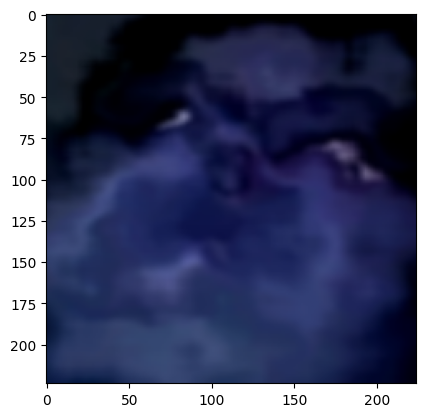

In [11]:
# 데이터 증강을 테스트
from matplotlib import pyplot as plt
for inputs, labels in train_loader:
    plt.imshow(inputs[0].permute(1, 2, 0))  # 첫 번째 이미지를 출력
    plt.show()
    break


In [12]:
# 데이터 로더에서 첫 번째 배치를 확인
for inputs, labels in train_loader:
    print(inputs.shape, labels.shape)  # 입력 데이터와 레이블의 크기 확인
    break
    

torch.Size([16, 3, 224, 224]) torch.Size([16])


In [13]:
print(type(inputs))  # torch.Tensor여야 합니다.

<class 'torch.Tensor'>


In [14]:
# 클래스별 샘플 수 확인
labels = [label for _, label in train_dataset.frames_and_labels]
label_counts = Counter(labels)

# 클래스별 가중치와 샘플 수 확인
class_weights = {label: len(labels) / count for label, count in label_counts.items()}
print(f"클래스별 샘플 수: {label_counts}")
print(f"클래스별 샘플링 가중치: {class_weights}")

# 오버샘플링 정도 확인
total_samples = len(labels)
over_sampled_counts = {label: int(class_weights[label] * label_counts[label]) for label in label_counts}
print(f"각 클래스에 대해 오버샘플링 된 샘플 수: {over_sampled_counts}")


클래스별 샘플 수: Counter({1: 2590, 0: 1384})
클래스별 샘플링 가중치: {0: 2.871387283236994, 1: 1.5343629343629344}
각 클래스에 대해 오버샘플링 된 샘플 수: {0: 3974, 1: 3974}


배치 라벨 값: [0.05, 0.9500000000000001, 0.9500000000000001, 0.05, 0.9500000000000001]


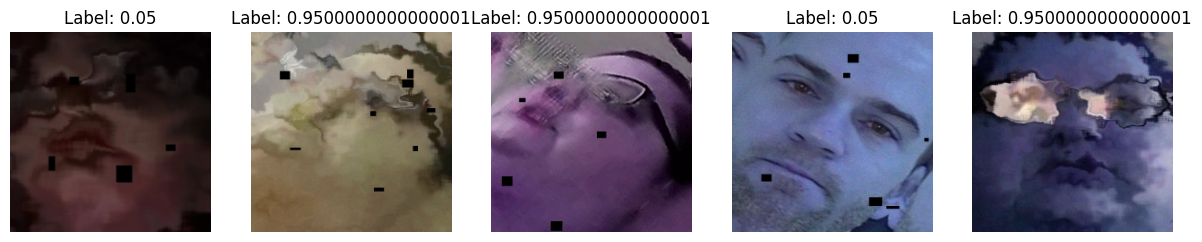

In [15]:
import matplotlib.pyplot as plt

# 하나의 배치 가져오기
def show_batch_images_and_labels(loader, num_images=5):
    # 첫 번째 배치에서 이미지와 레이블 가져오기
    data_iter = iter(loader)
    images, labels = next(data_iter)

    # 이미지 몇 개를 시각화하기
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        ax = axes[i]
        img = images[i].permute(1, 2, 0).numpy()  # Tensor에서 numpy 배열로 변환 (C x H x W -> H x W x C)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Label: {labels[i].item()}")

    # 라벨 값 출력
    print("배치 라벨 값:", labels[:num_images].tolist())

    plt.show()

# 훈련 데이터의 첫 번째 배치 이미지와 라벨 값 시각화
show_batch_images_and_labels(train_loader, num_images=5)


In [16]:
from collections import Counter

# 모든 라벨을 리스트로 저장
all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.numpy())

# 라벨 분포 출력
label_counts = Counter(all_labels)
print("Label distribution:", label_counts)


Label distribution: Counter({0.05: 2631, 0.9500000000000001: 2549})


In [17]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=1)

In [18]:
import torch
import torch.nn as nn
import timm
from torchsummary import summary

# EfficientNet-B0 모델 (num_classes=1로 설정)
class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=1, dropout_prob=0.3):
        super(EfficientNetB0, self).__init__()
        self.model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=num_classes)
        in_features = self.model.get_classifier().in_features
        self.model.classifier = nn.Sequential(
            nn.Dropout(dropout_prob),
            nn.Linear(in_features, num_classes)  # 출력 크기 1로 설정
        )

    def forward(self, x):
        return self.model(x)

# ConvNeXt Tiny 모델 (num_classes=1로 설정)
class ConvNeXtTiny(nn.Module):
    def __init__(self, num_classes=1, dropout_prob=0.3):
        super(ConvNeXtTiny, self).__init__()
        self.model = timm.create_model('convnext_tiny', pretrained=True, num_classes=num_classes)
        in_features = self.model.get_classifier().in_features
        self.model.classifier = nn.Sequential(
            nn.Dropout(dropout_prob),
            nn.Linear(in_features, num_classes)  # 출력 크기 1로 설정
        )

    def forward(self, x):
        return self.model(x)

# 앙상블 모델
class EnsembleModel(nn.Module):
    def __init__(self, model1, model2):
        super(EnsembleModel, self).__init__()
        self.models = nn.ModuleList([model1, model2])

    def forward(self, x):
        # 모든 모델을 통해 예측값을 계산한 후 평균내기
        outputs = [model(x) for model in self.models]
        stacked_outputs = torch.stack(outputs, dim=0)  # 모든 출력 쌓기
        return torch.mean(stacked_outputs, dim=0)  # 평균 앙상블 (로짓으로 출력)

# 모델 인스턴스 생성
effnet_model = EfficientNetB0(num_classes=1, dropout_prob=0.3)
convnext_model = ConvNeXtTiny(num_classes=1, dropout_prob=0.3)
ensemble_model = EnsembleModel(effnet_model, convnext_model)

# 모델 요약 출력
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ensemble_model = ensemble_model.to(device)

print("\nEnsemble Model Summary:")
summary(ensemble_model, input_size=(3, 224, 224), device=device.type)


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]


Ensemble Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
          Identity-2         [-1, 32, 112, 112]               0
              SiLU-3         [-1, 32, 112, 112]               0
    BatchNormAct2d-4         [-1, 32, 112, 112]              64
            Conv2d-5         [-1, 32, 112, 112]             288
          Identity-6         [-1, 32, 112, 112]               0
              SiLU-7         [-1, 32, 112, 112]               0
    BatchNormAct2d-8         [-1, 32, 112, 112]              64
          Identity-9         [-1, 32, 112, 112]               0
           Conv2d-10              [-1, 8, 1, 1]             264
             SiLU-11              [-1, 8, 1, 1]               0
           Conv2d-12             [-1, 32, 1, 1]             288
          Sigmoid-13             [-1, 32, 1, 1]               0
    SqueezeExc

In [19]:
import torch.nn as nn
import torch.optim as optim

# 모델 정의 (예: 앙상블 모델 사용)
model = ensemble_model  # 이미 정의된 ensemble_model을 사용

# BCEWithLogitsLoss를 사용
criterion = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss로 변경

# 옵티마이저 설정: Adam + L2 정규화
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)  # L2 정규화 추가

# 손실 함수와 옵티마이저 확인
print("Loss Function:", criterion)
print("Optimizer:", optimizer)


Loss Function: BCEWithLogitsLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
)


In [20]:
import torch
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt

def train_one_epoch(model, dataloader, criterion, optimizer, device, log_interval=100):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1).to(device)

    for i, (inputs, labels) in enumerate(dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device).unsqueeze(1).float()

        if i == 0:
            for k in range(min(5, inputs.size(0))):
                img = (inputs[k] * std + mean).clamp(0, 1).cpu()
                plt.imshow(img.permute(1, 2, 0).numpy())
                plt.show()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 예측값 계산
        preds = (torch.sigmoid(outputs) >= 0.5).float()

        # 정확도 계산 (라벨 스무딩 반영)
        # 스무딩된 라벨을 0.5 기준으로 이진화
        smoothed_labels = (labels > 0.5).float()
        correct += preds.eq(smoothed_labels).sum().item()

        # 손실 및 전체 샘플 수 집계
        running_loss += loss.item() * inputs.size(0)
        total += labels.size(0)

        if (i + 1) % log_interval == 0:
            print(f"Batch {i+1}/{len(dataloader)} - Loss: {loss.item():.4f}")

    return running_loss / len(dataloader.dataset), 100.0 * correct / total


def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device).unsqueeze(1).float()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 예측값 계산
            preds = (torch.sigmoid(outputs) >= 0.5).float()

            # 정확도 계산 (라벨 스무딩 반영)
            smoothed_labels = (labels > 0.5).float()
            correct += preds.eq(smoothed_labels).sum().item()

            # 손실 및 전체 샘플 수 집계
            running_loss += loss.item() * inputs.size(0)
            total += labels.size(0)

    return running_loss / len(dataloader.dataset), 100 * correct / total

Epoch 1/20
Train Loss: 0.4817, Train Acc: 81.9074, Train LogLoss: 0.4820
Test Loss: 0.4245, Test Acc: 85.0683, Test LogLoss: 0.4230
Epoch 2/20
Train Loss: 0.3872, Train Acc: 87.9970, Train LogLoss: 0.3871
Test Loss: 0.5274, Test Acc: 82.1241, Test LogLoss: 0.5245
Epoch 3/20
Train Loss: 0.3451, Train Acc: 91.3689, Train LogLoss: 0.3472
Test Loss: 0.5658, Test Acc: 84.9632, Test LogLoss: 0.5628
Epoch 4/20
Train Loss: 0.3233, Train Acc: 92.5767, Train LogLoss: 0.3245
Test Loss: 0.4065, Test Acc: 88.3281, Test LogLoss: 0.4065
Epoch 5/20
Train Loss: 0.3044, Train Acc: 93.7594, Train LogLoss: 0.3046
Test Loss: 0.3793, Test Acc: 89.6951, Test LogLoss: 0.3784
Epoch 6/20
Train Loss: 0.2984, Train Acc: 94.4892, Train LogLoss: 0.3000
Test Loss: 0.4360, Test Acc: 83.5962, Test LogLoss: 0.4338
Epoch 7/20
Train Loss: 0.2816, Train Acc: 95.4706, Train LogLoss: 0.2816
Test Loss: 0.4867, Test Acc: 84.1220, Test LogLoss: 0.4887
Epoch 8/20
Train Loss: 0.2673, Train Acc: 96.0242, Train LogLoss: 0.2676
Tes

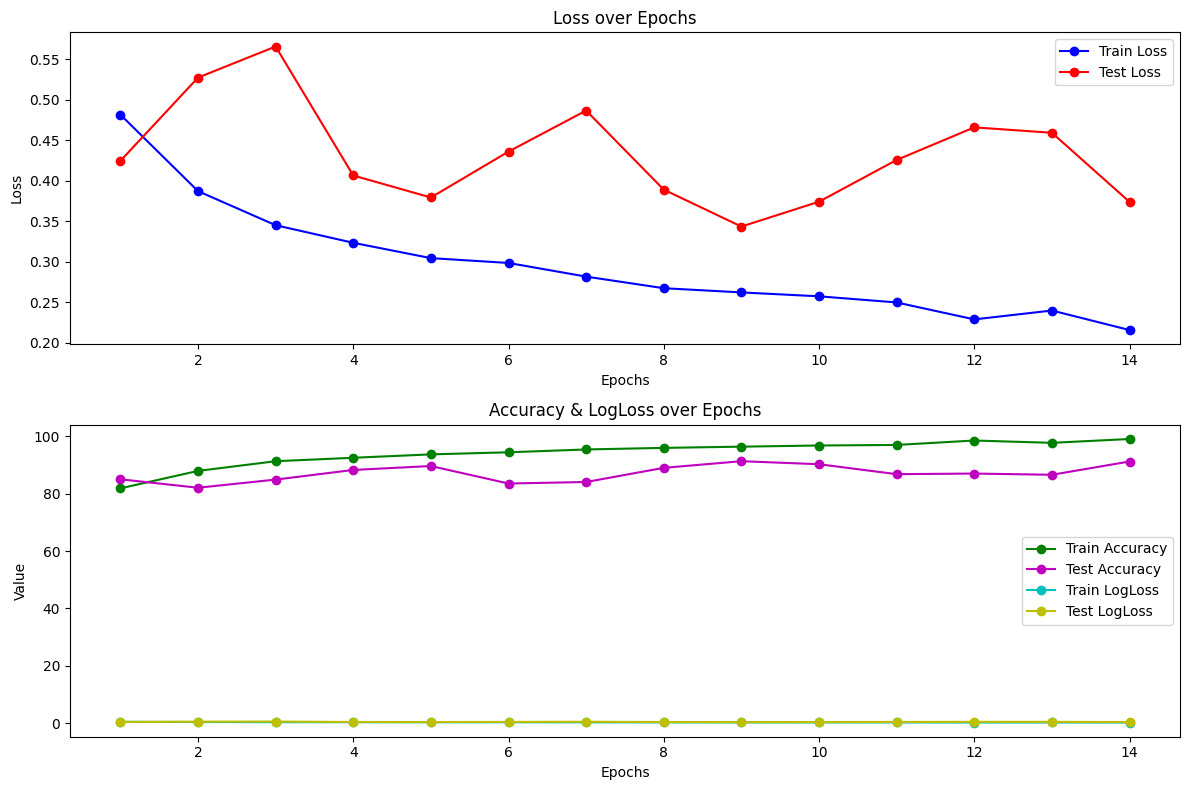

In [22]:
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# 데이터 증가 (Data Augmentation)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# LogLoss 계산 함수
def calculate_log_loss(predictions, labels):
    epsilon = 1e-12  # 안정성을 위한 클램핑
    predictions = torch.sigmoid(predictions)  # 로짓 → 확률 변환
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)  # 클램핑 적용
    log_loss = -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))
    return log_loss

# 학습 및 평가 함수
def train_or_evaluate(model, dataloader, criterion, optimizer=None, device="cpu", is_train=True):
    if is_train:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    correct = 0
    total = 0
    log_losses = []

    with torch.set_grad_enabled(is_train):
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.unsqueeze(1).float()

            outputs = model(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            if is_train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # LogLoss 계산
            log_loss = calculate_log_loss(outputs, labels)
            log_losses.append(log_loss.item())

            # 정확도 계산
            preds_prob = torch.sigmoid(outputs)
            preds = (preds_prob >= 0.5).float()
            correct += ((preds == (labels > 0.5).float()).sum().item())
            total += labels.size(0)

            # 손실 집계
            total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(dataloader.dataset)
    accuracy = 100 * correct / total
    avg_log_loss = np.mean(log_losses)
    return avg_loss, accuracy, avg_log_loss

# 학습 루프
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs, device, patience=5):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float("inf")
    patience_count = 0
    history = {"train_loss": [], "train_acc": [], "train_log_loss": [],
               "test_loss": [], "test_acc": [], "test_log_loss": []}

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Train
        train_loss, train_acc, train_log_loss = train_or_evaluate(
            model, train_loader, criterion, optimizer, device, is_train=True
        )
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["train_log_loss"].append(train_log_loss)

        # Test
        test_loss, test_acc, test_log_loss = train_or_evaluate(
            model, test_loader, criterion, device=device, is_train=False
        )
        history["test_loss"].append(test_loss)
        history["test_acc"].append(test_acc)
        history["test_log_loss"].append(test_log_loss)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train LogLoss: {train_log_loss:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test LogLoss: {test_log_loss:.4f}")

        # Learning Rate Scheduler
        scheduler.step(test_loss)

        # Early Stopping
        if test_loss < best_loss:
            best_loss = test_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            patience_count = 0
        else:
            patience_count += 1
            if patience_count >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(best_model_wts)
    return model, history

# 결과 시각화 함수
def plot_training_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12, 8))

    # 손실 플롯
    plt.subplot(2, 1, 1)
    plt.plot(epochs, history["train_loss"], 'bo-', label='Train Loss')
    plt.plot(epochs, history["test_loss"], 'ro-', label='Test Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도 및 LogLoss 플롯
    plt.subplot(2, 1, 2)
    plt.plot(epochs, history["train_acc"], 'go-', label='Train Accuracy')
    plt.plot(epochs, history["test_acc"], 'mo-', label='Test Accuracy')
    plt.plot(epochs, history["train_log_loss"], 'co-', label='Train LogLoss')
    plt.plot(epochs, history["test_log_loss"], 'yo-', label='Test LogLoss')
    plt.title('Accuracy & LogLoss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 사용 예시
# 모델 정의
model = EnsembleModel(effnet_model, convnext_model)  # 사용자 정의 모델
model.to(device)

# 손실 함수, 옵티마이저 및 스케줄러 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# 학습
num_epochs = 20
model, history = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs, device)

# 결과 시각화
plot_training_history(history)
